# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.

## Import libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet

from sklearn.metrics import mean_squared_error

%matplotlib inline

## Exploratory Data Analysis 

In [2]:
df = pd.read_csv('Advertising.csv', index_col= 0)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


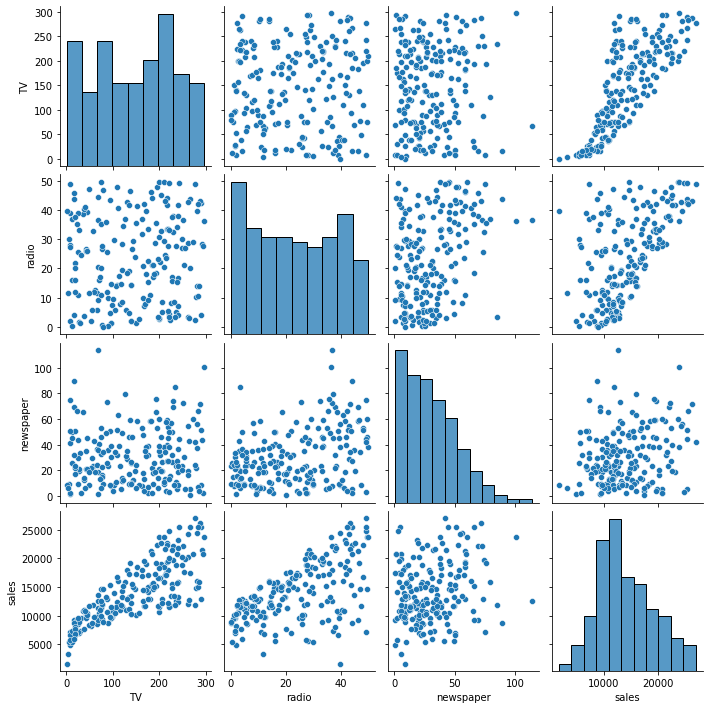

In [4]:
sns.pairplot(data=df)

In [5]:
def scatter_plot(feature, target):
    plt.figure(figsize=(16,8))
    plt.scatter(df[feature],
                df[target],
                c = 'black')
    plt.xlabel(f"Money spend on {feature} ads ($)", fontsize=14)
    plt.ylabel('Sales', fontsize=14)


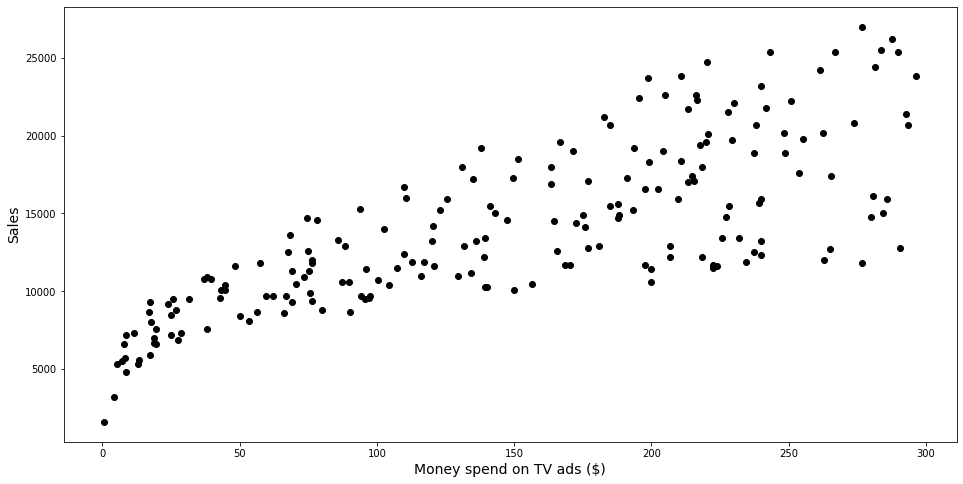

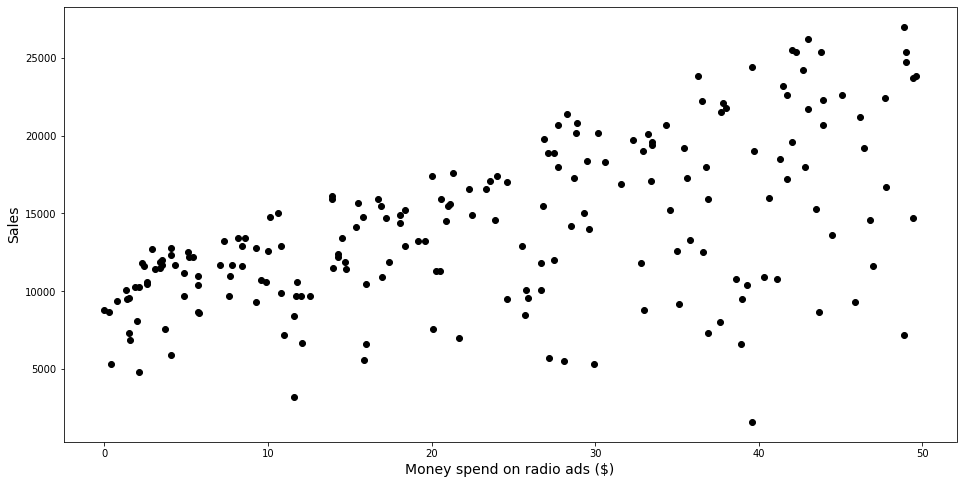

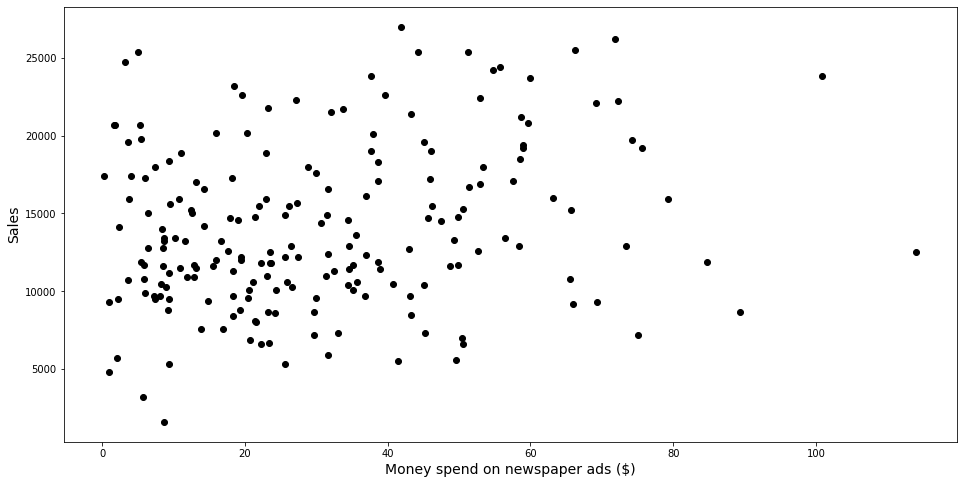

In [6]:
for col in df.columns[:-1]:
    scatter_plot(col,'sales')

In [7]:
df.corr()['sales']

TV           0.782224
radio        0.576223
newspaper    0.228299
sales        1.000000
Name: sales, dtype: float64

<AxesSubplot:>

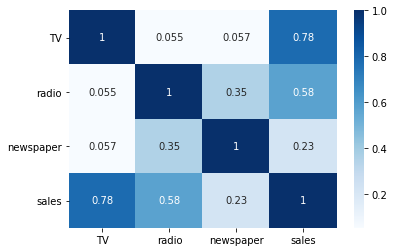

In [8]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)

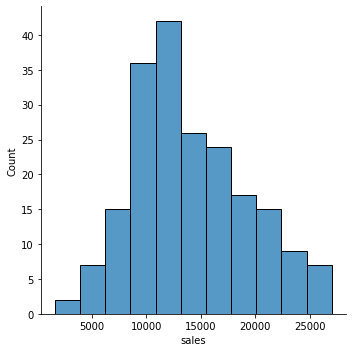

In [9]:
sns.displot(df['sales'])

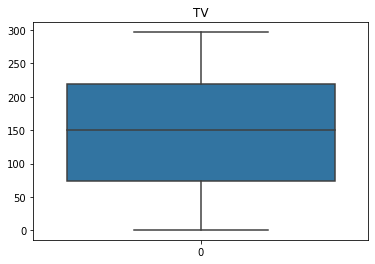

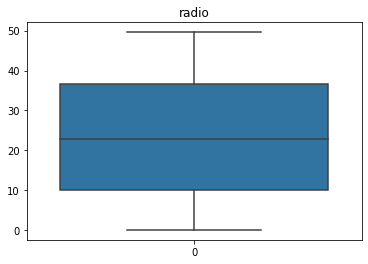

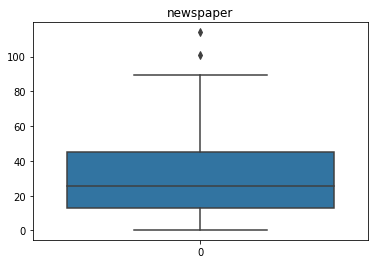

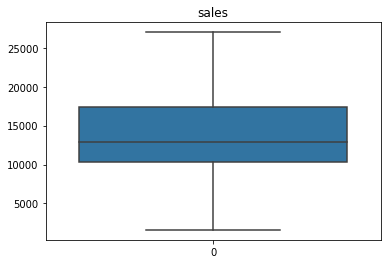

In [10]:
for col in df.columns:
    sns.boxplot(data=df[col])
    plt.title(col)
    plt.show()

In [11]:
def drop_outlayers_df(df,column):
    #get 1est quartile and 3er quartile 
    q1 = df[column].quantile(q=0.25)
    q3 = df[column].quantile(q=0.75)
    #inter quartile range
    iqr = q3 - q1
    
    #get maximun
    maximum = q3 + (1.5*iqr)
    
    #get minimum
    minimum = q1 - (1.5*iqr)
    
    #get indexes row outlayers, max and min
    idx_maximum = df[df[column] > maximum].index
    idx_minimum = df[df[column] < minimum].index
    
    #drop rox outlayers
    df.drop(idx_maximum, axis = 0, inplace = True)
    df.drop(idx_minimum, axis = 0, inplace = True)
    
    return df



In [12]:
for col in df.columns:
    drop_outlayers_df(df,col)

<AxesSubplot:>

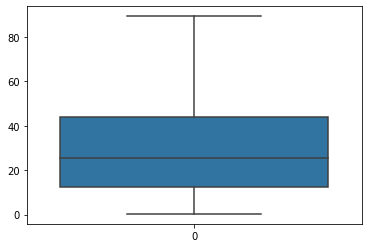

In [13]:
  sns.boxplot(data=df['newspaper'])

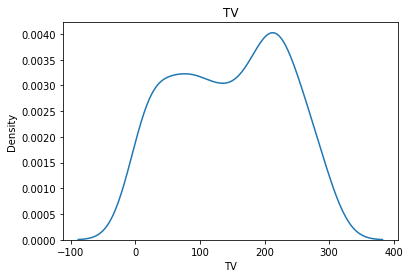

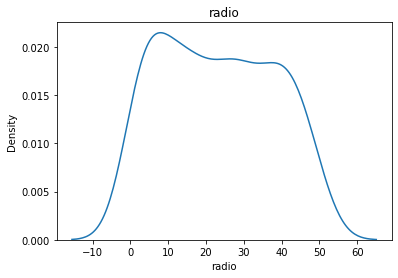

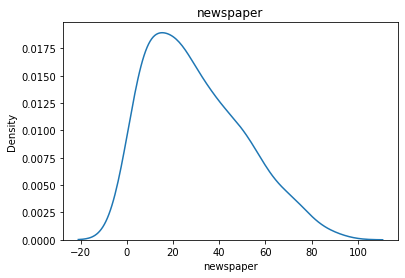

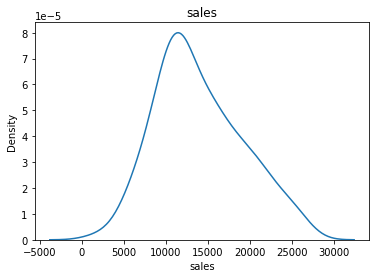

In [14]:
for col in df.columns:
    sns.kdeplot(data=df[col])
    plt.title(col)
    plt.show()

## Modelling 

In [17]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [18]:
X[:5]

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [19]:
y[:5]

0    22100.0
1    10400.0
2     9300.0
3    18500.0
4    12900.0
Name: sales, dtype: float64

In [20]:
#Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [21]:
#Teacher solution
"""
 train_test_split(df.drop(columns=['sales']), df['sales'], test_size = 0.20, random_state = 42)
"""

"\n train_test_split(df.drop(columns=['sales']), df['sales'], test_size = 0.20, random_state = 42)\n"

In [22]:
X_train.shape

(158, 3)

In [23]:
y_train.shape

(158,)

### Multiple linear regression

In [26]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
lr_model.coef_, lr_model.intercept_

(array([ 45.22885522, 182.39274811,   5.04290769]), 2979.8978284169098)

In [31]:
lr_predict = lr_model.predict(X_test)

#mse = np.mean((lr_predict - y_test)**2)
#print("Mean squared error on test set:", mse)

MSE = mean_squared_error(y_test, lr_predict)
print('MSE:', MSE)
print('RMSE', np.sqrt(MSE))

MSE: 2740911.9066899945
RMSE 1655.5699642993027


In [32]:
lr_coeff = pd.DataFrame()
lr_coeff['Columns'] = df.columns[:-1]
lr_coeff['Coefficient Estimate'] = lr_model.coef_
lr_coeff

,Columns,Coefficient Estimate
0,TV,45.228855
1,radio,182.392748
2,newspaper,5.042908


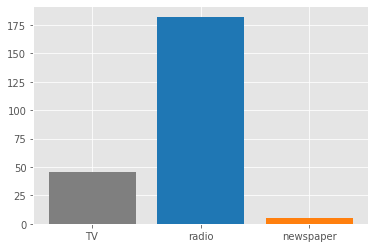

In [33]:
fig, ax = plt.subplots()

color = ['tab:gray', 'tab:blue', 'tab:orange']

ax.bar(lr_coeff['Columns'],
        lr_coeff['Coefficient Estimate'],
        color = color)

ax.spines['bottom'].set_position('zero')
#ax.set_ylim([-4,5])

plt.style.use('ggplot')

### Ridge regression 

In [35]:
lr_ridge = Ridge(alpha=20) #Cuanto más alto sea 'alpha' más suaviza los pesos de los omegas'w' de las variables

lr_ridge.fit(X_train, y_train)
lr_ridge_pred = lr_ridge.predict(X_test)

#mean_squared_error_ridge = np.mean((lr_ridge_pred - y_test)**2)
#print("Mean_square_error_ridge",mean_squared_error_ridge)

MSE = mean_squared_error(y_test, lr_ridge_pred)
print('MSE:', MSE)
print('RMSE:',np.sqrt(MSE))

MSE: 2742383.2789795944
RMSE: 1656.014274992699


In [36]:
ridge_coeff = pd.DataFrame()
ridge_coeff['Columns'] = df.columns[:-1]
ridge_coeff['Coefficient Estimate'] = lr_ridge.coef_

In [37]:
ridge_coeff

,Columns,Coefficient Estimate
0,TV,45.228739
1,radio,182.273279
2,newspaper,5.074731


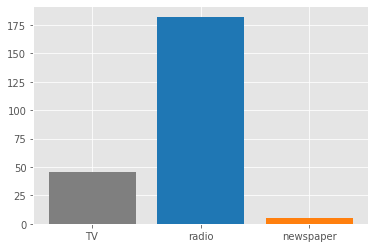

In [38]:
fig, ax = plt.subplots()

color = ['tab:gray', 'tab:blue', 'tab:orange']

ax.bar(ridge_coeff['Columns'],
        ridge_coeff['Coefficient Estimate'],
        color = color)

ax.spines['bottom'].set_position('zero')
#ax.set_ylim([-4,5])

plt.style.use('ggplot') 

In [39]:
ridge = Ridge()

parameters ={'alpha':  [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100 ]}

ridge_regressor = GridSearchCV(ridge, param_grid= parameters, scoring='neg_mean_squared_error', cv = 5, error_score= np.nan)

ridge_regressor = ridge_regressor.fit(X_train, y_train)
ridge_regressor

C:\Users\pilar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [40]:
ridge_regressor.best_params_

{'alpha': 1e-05}

In [41]:
ridge_regressor.best_score_

-3071244.345114257

### Lasso 

In [49]:
lr_lasso = Lasso(alpha=10)

lr_lasso.fit(X_train, y_train)
lr_lasso_pred = lr_lasso.predict(X_test)

mean_squared_error_lasso = np.mean((lr_lasso_pred - y_test)**2)
print("2Mean squared error on test set", mean_squared_error_lasso)

mse = mean_squared_error(y_test, lr_lasso_pred)
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))

2Mean squared error on test set 2740961.091157593
MSE:  2740961.091157593
RMSE:  1655.5848184727936


In [50]:
lasso_coefficient = pd.DataFrame()
lasso_coefficient['Columns'] = X_train.columns
lasso_coefficient['Coefficient Estimate'] = pd.Series(lr_lasso.coef_)

lasso_coefficient

,Columns,Coefficient Estimate
0,TV,45.227921
1,radio,182.357000
2,newspaper,5.030166


In [52]:
lasso = Lasso()

parameters = parameters ={'alpha':  [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100 ]}

lasso_regression = GridSearchCV(lasso, param_grid= parameters, scoring='neg_mean_squared_error', cv = 5, n_jobs = -1, iid= False)

lasso_regression = lasso_regression.fit(X_train, y_train)
lasso_regression

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid=False, n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [54]:
lasso_regression.best_params_

{'alpha': 100}

In [62]:
print("Best MSE_lasso:",-lasso_regression.best_score_)

Best MSE_lasso: 3064251.6813758425


### ElasticNet

In [79]:
elastic_lr = ElasticNet(l1_ratio= 1)

elastic_lr.fit(X_train, y_train)

elastic_lr_predic = elastic_lr.predict(X_test)

mse_elastic = mean_squared_error(y_test, elastic_lr_predic)

print("Elastic MSE:", mse_elastic)
print("RMSE:", np.sqrt(mse_elastic))

Elastic MSE: 2740918.3044735147
RMSE: 1655.5718964978582


In [80]:
elastic = ElasticNet()

grid = {'alpha':  [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100 ],
        'l1_ratio': np.arange(0.01, 1, 0.1)}

elastic = GridSearchCV(elastic, param_grid=grid, scoring= 'neg_mean_squared_error', cv= 5, n_jobs= -1, iid= False)

elastic_regression = elastic.fit(X_train, y_train)

In [81]:
elastic_regression.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.91}

In [83]:
print("Best MSE_elastic:",-elastic_regression.best_score_)

Best MSE_elastic: 3066361.660277308


### StandardScaler

In [95]:
from sklearn import preprocessing
X_train.tail()

,TV,radio,newspaper
108,13.1,0.4,25.6
14,204.1,32.9,46.0
93,250.9,36.5,72.3
181,218.5,5.4,27.4
104,238.2,34.3,5.3


In [96]:
X_train.isnull().any()

TV           False
radio        False
newspaper    False
dtype: bool

In [111]:
std_scaler = preprocessing.StandardScaler()

std_scaler = std_scaler.fit(X_train) #standarizado
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [112]:
X_train_std[:5]

array([[ 0.4267515 ,  1.39195161, -1.35187881],
       [-1.62566033,  1.7249443 ,  2.15543509],
       [-0.10440616, -0.56604543, -0.94516438],
       [-0.87202216, -0.39954908, -0.81597273],
       [-1.43579476, -0.79914031, -0.01211361]])

In [113]:
X_test_std[:5]

array([[-1.3600815 ,  0.10659981, -1.32795443],
       [-0.10557098, -0.57936514, -0.20829351],
       [ 1.55080225,  1.10557789,  1.23673895],
       [-0.5085985 , -1.15211257,  0.21277555],
       [-1.59071575,  0.92576184,  0.72954213]])

In [103]:
X_train_std.mean()

2.810691201582675e-17

In [104]:
X_train_std.std()

1.0

In [114]:
min_max_scaler =preprocessing.MinMaxScaler()

min_max_scaler = min_max_scaler.fit(X_train)
X_train_minmax = min_max_scaler.transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

In [115]:
X_train_minmax[:5]

array([[0.62888358, 0.88438134, 0.01571268],
       [0.02731308, 0.98580122, 0.83838384],
       [0.47319904, 0.28803245, 0.11111111],
       [0.24820758, 0.33874239, 0.14141414],
       [0.08296347, 0.21703854, 0.32996633]])

In [116]:
X_test_std[:5]

array([[-1.3600815 ,  0.10659981, -1.32795443],
       [-0.10557098, -0.57936514, -0.20829351],
       [ 1.55080225,  1.10557789,  1.23673895],
       [-0.5085985 , -1.15211257,  0.21277555],
       [-1.59071575,  0.92576184,  0.72954213]])

In [105]:
X_train_minmax.mean()

0.4323473394099061

In [106]:
X_train_minmax.std()

0.28838277681915775

In [ ]:
X